<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 5**

Adding Kernel Regularizers

image normalization

L2 regularization

ReLU after BN

Run your new code for 40 epochs and save the model with highest validation accuracy

Find out 25 misclassified images from the validation dataset and create an image gallery


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, Activation
from keras.utils import np_utils
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist #The Avengers Assemble

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loadin the data from mnist folder into a dataframe of training and test images.

(60000, 28, 28)


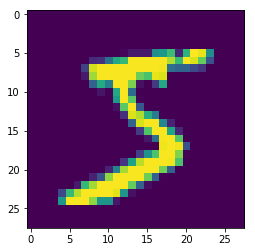

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, y_train, batch_size=128)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())



Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(128, 28, 28, 1) -0.015147499 0.98377854
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(18, 3, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01),input_shape=(28,28,1))) #26

model.add(Conv2D(16, 3, 3)) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(18, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(15, 3, 3, activation='relu')) #9
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #7

model.add(Convolution2D(16, 3, 3, activation='relu')) #5

model.add(Convolution2D(10, 1, 1)) #5

model.add(Convolution2D(10, 5)) 

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        2608      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 18)        2610      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 15)          2445      
__________

In [0]:
checkpointer = ModelCheckpoint(filepath="./drive/My Drive/MNIST is my bitch/model1.hdf5", verbose=1, save_best_only=True, monitor="val_acc")


In [96]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=96, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1),checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0444 - acc: 0.9867 - val_loss: 0.0475 - val_acc: 0.9847

Epoch 00001: val_acc did not improve from 0.99390
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 5s 91us/step - loss: 0.0336 - acc: 0.9900 - val_loss: 0.0330 - val_acc: 0.9908

Epoch 00002: val_acc did not improve from 0.99390
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 5s 91us/step - loss: 0.0246 - acc: 0.9926 - val_loss: 0.0312 - val_acc: 0.9909

Epoch 00003: val_acc did not improve from 0.99390
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 5s 91us/step - loss: 0.0234 - acc:

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


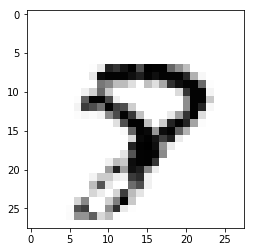

In [98]:

image_index = 6555
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(Y_test[6555])
print(y_test[6555])


In [99]:
print(score)

[0.03825793648851104, 0.9934]


In [0]:
y_pred = model.predict(X_test)

In [101]:
numberofincorrect = 0
incorrectpos = []
for i in range(0,10000):
    if(y_pred[i].argmax() != y_test[i] ):
#         print("POS ",i)
#         print("Y_pred ",y_pred[i].argmax())
#         print("Y_test ",y_test[i])
#         print(" f u ")
        numberofincorrect = numberofincorrect + 1 
        incorrectpos.append(i)
        
print("numberofincorrect ",numberofincorrect)


numberofincorrect  66


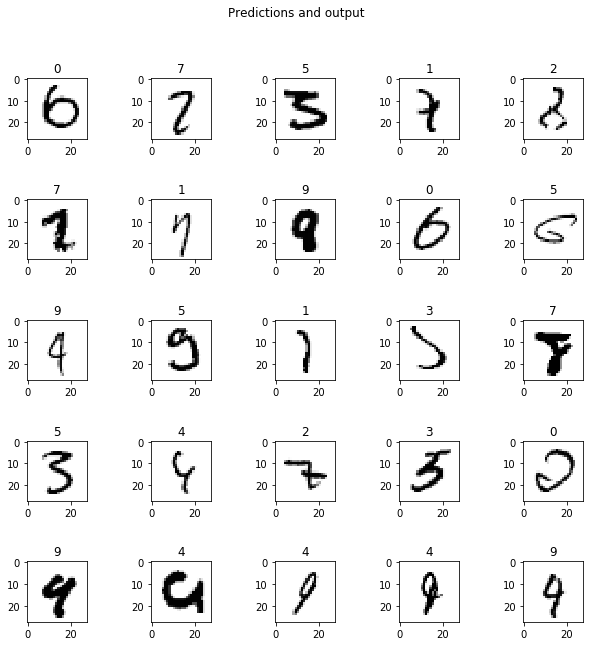

In [102]:
#To print 25 incorrectly predicted images

# for i in range (0,26):
#   image_index = incorrectpos[i]
#   plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
  
w=28
h=28
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 26):
    image_index = incorrectpos[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
    plt.title(y_pred[image_index].argmax())
    plt.subplots_adjust(hspace=1, wspace=1)
    plt.suptitle("Predictions and output")
#     print(y_test[image_index])
    
    
plt.show()
#   pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
#   print(pred.argmax())
#   print(Y_test[i])
#   print(y_test[i])

In [103]:
print(y_pred[:9])
print(y_test[:9])

[[3.10140732e-28 2.83933364e-19 6.20722261e-16 5.79766755e-19
  3.54466405e-27 8.26038625e-26 1.75652804e-30 1.00000000e+00
  4.28256764e-28 1.01557126e-19]
 [6.47911833e-21 2.54670196e-15 1.00000000e+00 1.18160438e-24
  5.18497818e-18 5.82155929e-26 6.54254284e-16 7.80070155e-24
  1.72901807e-23 6.38127767e-27]
 [6.12383728e-19 1.00000000e+00 1.61909554e-17 6.95598634e-21
  6.00664470e-14 1.42997082e-16 6.01939475e-15 6.16729051e-15
  3.57968803e-16 5.13957930e-21]
 [1.00000000e+00 1.76262992e-22 2.56061981e-17 3.38248649e-18
  6.87091307e-20 1.14906476e-19 5.43757010e-12 2.49212636e-21
  5.75642215e-16 1.55696289e-16]
 [2.00662472e-28 5.08217229e-25 1.25156817e-27 1.68920016e-35
  1.00000000e+00 1.44777202e-37 5.33120789e-27 2.78520433e-25
  2.86858249e-22 1.90648670e-18]
 [2.12096347e-20 1.00000000e+00 2.56024600e-19 1.79218292e-24
  4.16198488e-13 8.75226316e-21 1.74230696e-15 1.23850246e-12
  4.91143142e-20 3.41742368e-20]
 [1.70577653e-28 4.51735178e-17 6.76644369e-23 1.82744992e

In [104]:
print(y_pred[0,0])

3.1014073e-28


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

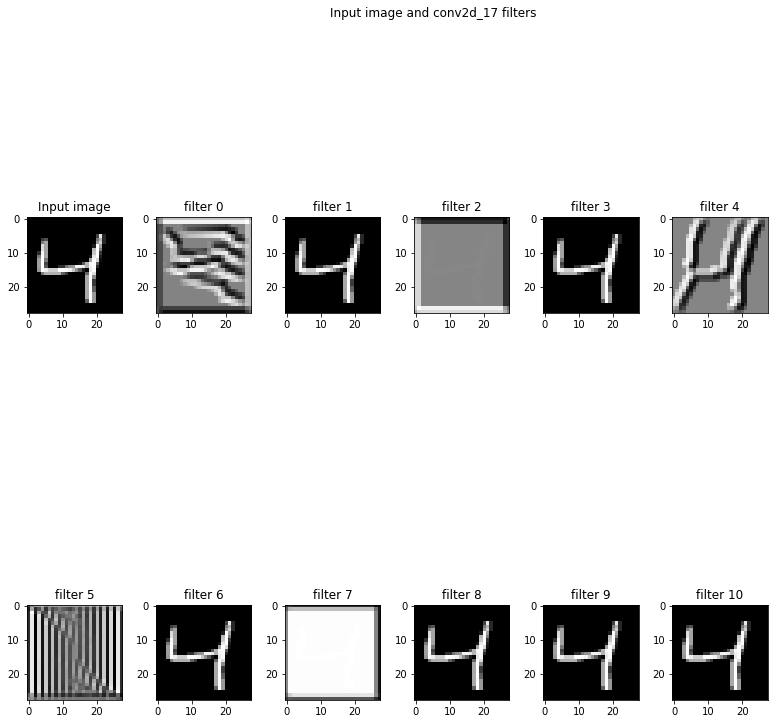

In [107]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_17'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()